In [1]:
from templates import *

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: saranga7. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /users/biocomp/mahanta/.netrc


In [2]:
import random

#### Branch saranga

In [3]:
device = 'cuda:2'
conf = ffhq128_autoenc_w_classifier()
conf.include_classifier = False
# conf.name = 'ffhq128_autoenc_w_classifier_weightedLoss_step_BN'
conf.name = 'ffhq128_w_newclassifier2'
# print(conf.name)
model = LitModel(conf)
# state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
state = torch.load('checkpoints/ffhq128_w_newclassifier2/epoch_checkpoints/epoch=179-step=49139.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device)
model.model.eval()
model.model.to(device)

Global seed set to 0
Using cache found in /users/biocomp/mahanta/.cache/torch/hub/pytorch_vision_v0.10.0


Model params: 124.96 M


BeatGANsAutoencModel(
  (time_embed): TimeStyleSeperateEmbed(
    (time_embed): Sequential(
      (0): Linear(in_features=128, out_features=512, bias=True)
      (1): SiLU()
      (2): Linear(in_features=512, out_features=512, bias=True)
    )
    (style): Identity()
  )
  (input_blocks): ModuleList(
    (0): TimestepEmbedSequential(
      (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1-2): 2 x TimestepEmbedSequential(
      (0): ResBlock(
        (in_layers): Sequential(
          (0): GroupNorm32(32, 128, eps=1e-05, affine=True)
          (1): SiLU()
          (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (h_upd): Identity()
        (x_upd): Identity()
        (emb_layers): Sequential(
          (0): SiLU()
          (1): Linear(in_features=512, out_features=256, bias=True)
        )
        (cond_emb_layers): Sequential(
          (0): SiLU()
          (1): Linear(in_features=512, out_features=128, bias

In [4]:
data = ImageDataset('imgs_align', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch = data[30]['img'][None]

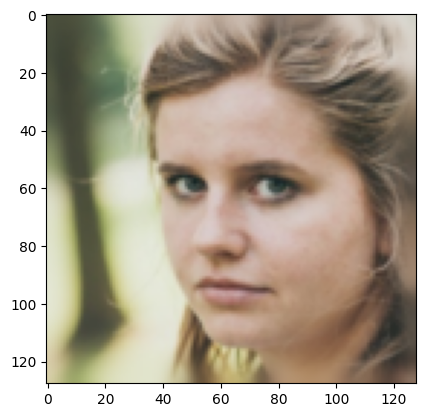

In [5]:
import matplotlib.pyplot as plt
plt.imshow(batch[0].permute([1, 2, 0]) / 2 + 0.5)

# Encode

In [6]:
cond = model.encode(batch.to(device), mode = 'non_ema')
xT = model.encode_stochastic(batch.to(device), cond, T=100, mode = 'non_ema')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.57982..4.7114706].


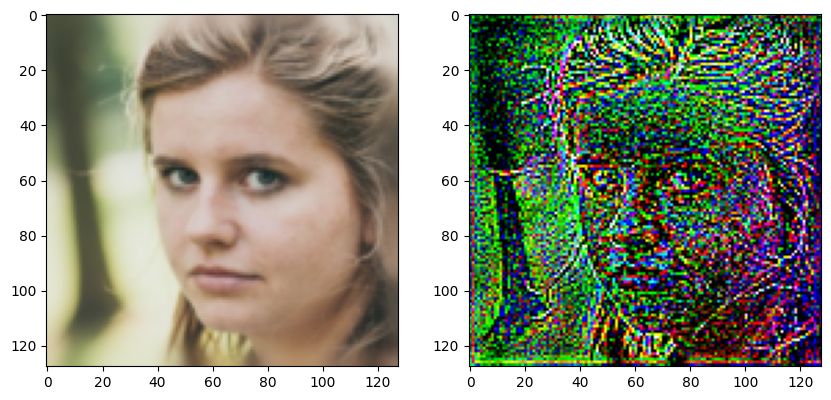

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(xT[0].permute(1, 2, 0).cpu())

# Decode

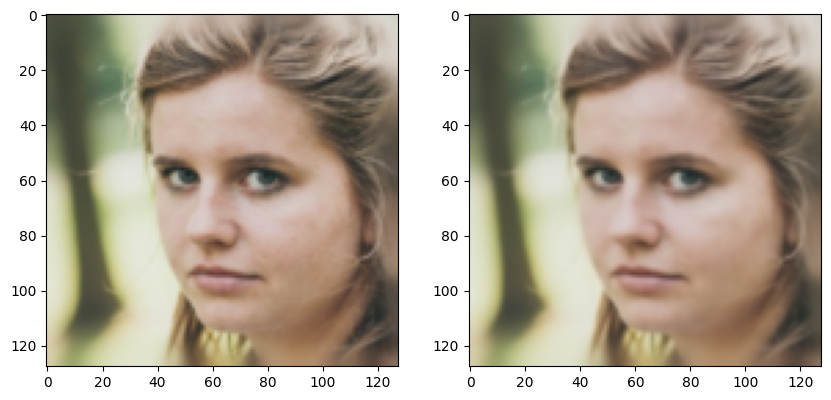

In [8]:
pred = model.render(xT, cond, T=100, mode = 'non_ema')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(pred[0].permute(1, 2, 0).cpu())

In [9]:
xT2 = torch.randn_like(xT)

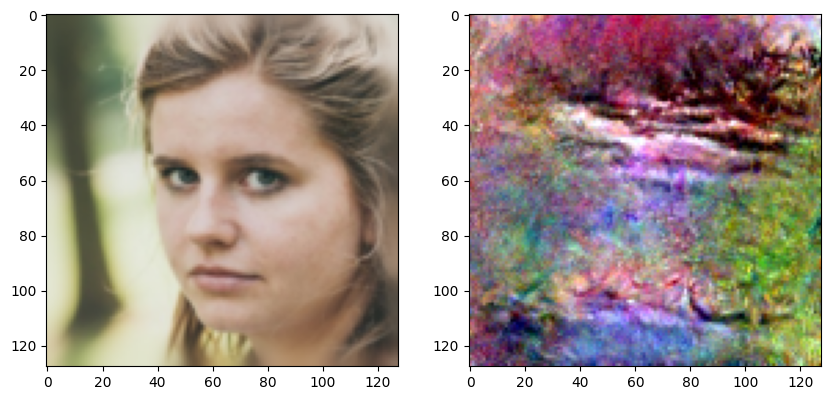

In [10]:
pred = model.render(xT2, cond, T=100, mode = 'non_ema')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(pred[0].permute(1, 2, 0).cpu())

# Decode with class_concatenated cond

In [11]:
cond = model.encode(batch.to(device), mode = 'non_ema')
modified_cond = model.model.classifier_component(x = batch.to(device), cond = cond)
modified_xT = model.encode_stochastic(batch.to(device), modified_cond, T=100, mode = 'non_ema')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.270901..4.7102027].


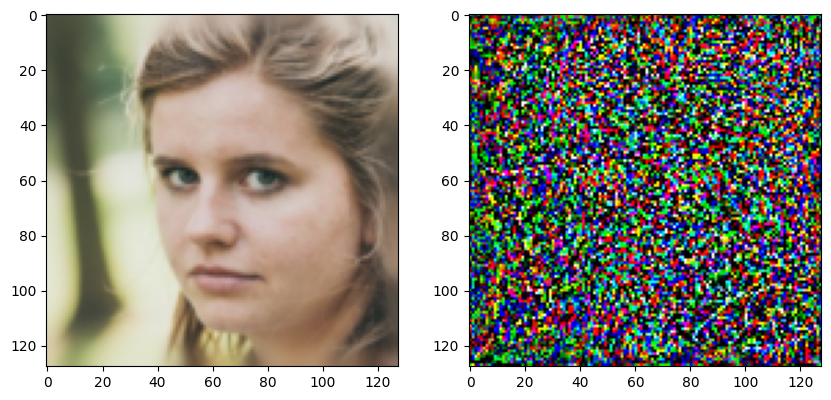

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(modified_xT[0].permute(1, 2, 0).cpu())

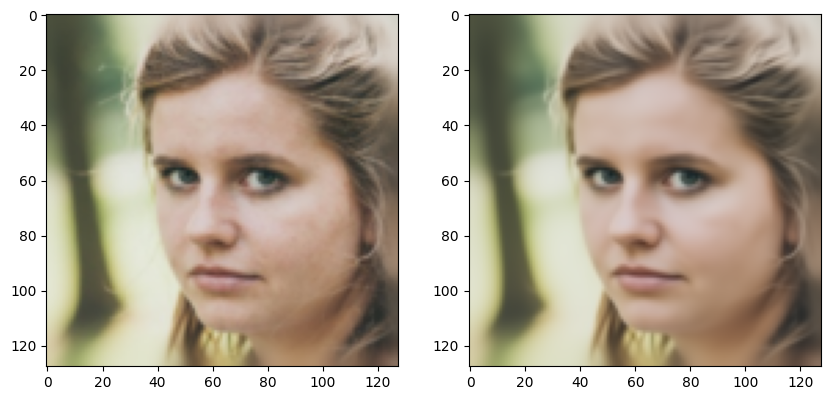

In [13]:
pred = model.render(modified_xT, modified_cond, T = 100, mode = 'non_ema')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(pred[0].permute(1, 2, 0).cpu())

In [14]:
xT_random = torch.randn_like(modified_xT)

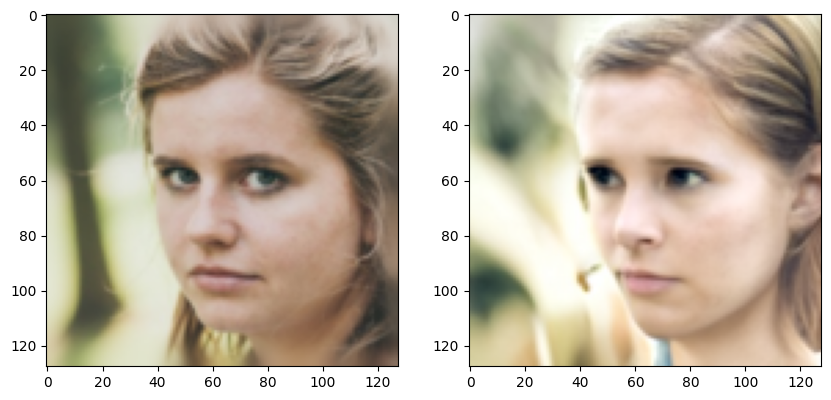

In [15]:
pred = model.render(xT_random, modified_cond, T = 100, mode = 'non_ema')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(pred[0].permute(1, 2, 0).cpu())

# Decode with class_concatendated cond (flip classifier)

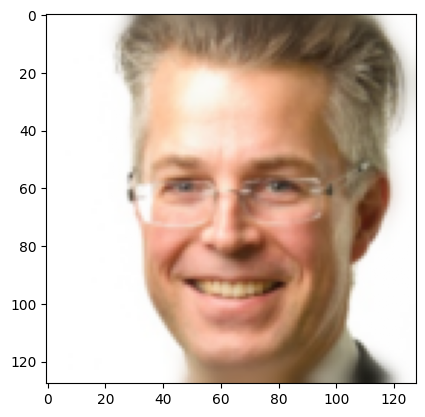

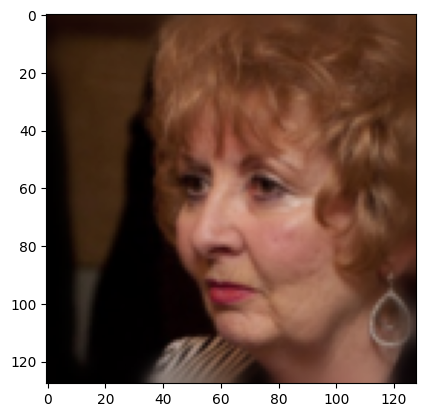

In [16]:
male = data[232]['img'][None]
plt.imshow(male[0].permute([1, 2, 0]) / 2 + 0.5)
plt.show()

female = data[123]['img'][None]
plt.imshow(female[0].permute([1, 2, 0]) / 2 + 0.5)
plt.show()

In [27]:
def flip_class(ip_img, encoding_T = 100, rendering_T = 100):
    cond = model.encode(ip_img.to(device), mode = 'non_ema')
    cond_ip = model.model.classifier_component(x = ip_img.to(device), cond = cond)

    print("Encoding stochastic...")
    xT = model.encode_stochastic(ip_img.to(device), cond_ip, T = encoding_T, mode = 'non_ema')

    c_ip = model.model.classifier_component.mobile_net(ip_img.to(device))
    c_ip = F.softmax(c_ip, dim = 1)
    c_opp = torch.flip(torch.round(c_ip), [1])
    print(c_ip, c_opp)

    # taking classifier output of sandy and concatenating that to cond
    cond_class = torch.cat([c_opp, cond], axis = 1)
    modified_cond = model.model.classifier_component.linear_projection(cond_class)

    cosine_similarity = F.cosine_similarity(cond_ip, modified_cond).item()
    euclidean_distance = torch.dist(cond_ip, modified_cond, p=2)


    print(f"\n\nCosine similarity: {cosine_similarity} \n Euclidean distance: {euclidean_distance}")


    
    print("Generating results...")
    pred = model.render(xT, modified_cond, T = rendering_T, mode = 'non_ema')
    c_pred = F.softmax(model.model.classifier_component.mobile_net(pred), dim = 1)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ori = (ip_img + 1) / 2
    ax[0].imshow(ori[0].permute(1, 2, 0).detach().cpu())
    ax[0].set_title(c_ip)
    ax[1].imshow(pred[0].permute(1, 2, 0).detach().cpu())
    ax[1].set_title(c_pred)
   
    plt.show()


In [28]:
x = torch.tensor([1.9, 0.51])
rounded_tensor = torch.round(x)
print(rounded_tensor)   

tensor([2., 1.])


Encoding stochastic...
tensor([[0.5921, 0.4079]], device='cuda:2') tensor([[0., 1.]], device='cuda:2')


Cosine similarity: 0.9982695579528809 
 Euclidean distance: 0.6285358667373657
Euclidean distance of the same cond: 0.0
Generating results...


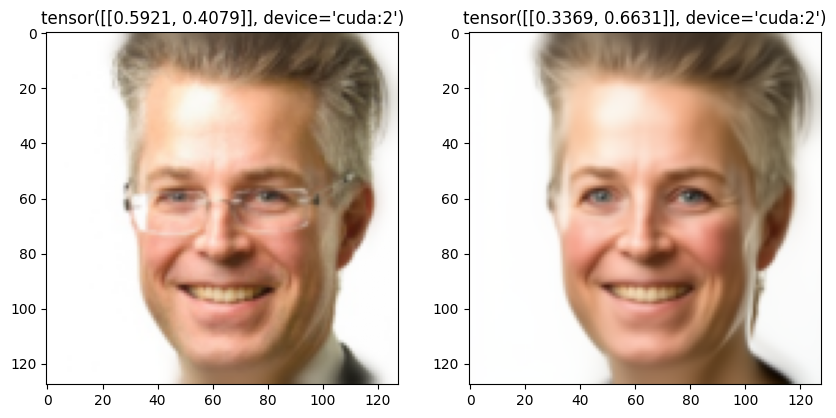

In [29]:
flip_class(male)

Encoding stochastic...
tensor([[0.0721, 0.9279]], device='cuda:2') tensor([[1., 0.]], device='cuda:2')


Cosine similarity: 0.9963404536247253 
 Euclidean distance: 0.9850516319274902
Euclidean distance of the same cond: 0.0
Generating results...


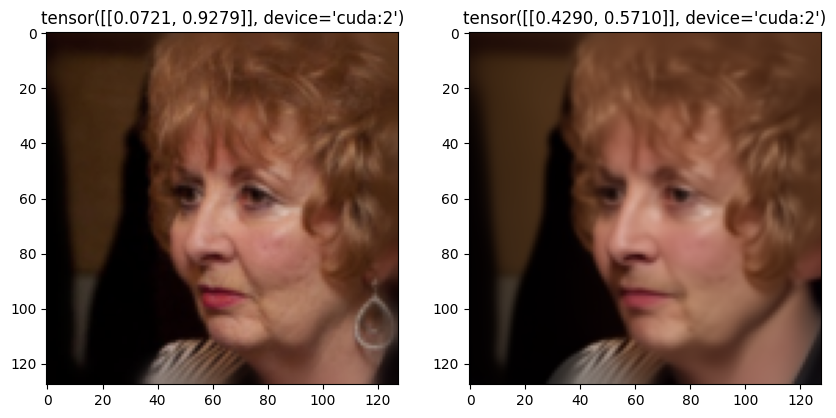

In [30]:
flip_class(female)

Encoding stochastic...


tensor([[9.1415e-04, 9.9909e-01]], device='cuda:2') tensor([[1., 0.]], device='cuda:2')


Cosine similarity: 0.9957612752914429 
 Euclidean distance: 1.0606000423431396
Euclidean distance of the same cond: 0.0
Generating results...


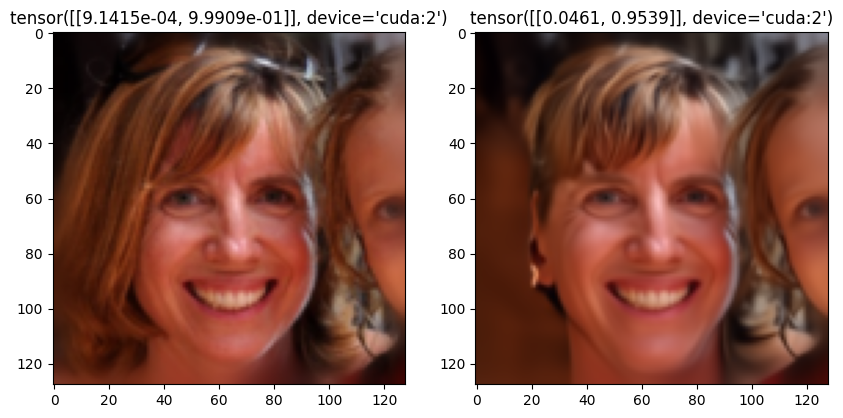

In [31]:
i = random.choice(range(0, len(data)))
img = data[i]['img'][None]
flip_class(img)

Encoding stochastic...


tensor([[0.0111, 0.9889]], device='cuda:2') tensor([[1., 0.]], device='cuda:2')


Cosine similarity: 0.9955676198005676 
 Euclidean distance: 1.0497630834579468
Euclidean distance of the same cond: 0.0
Generating results...


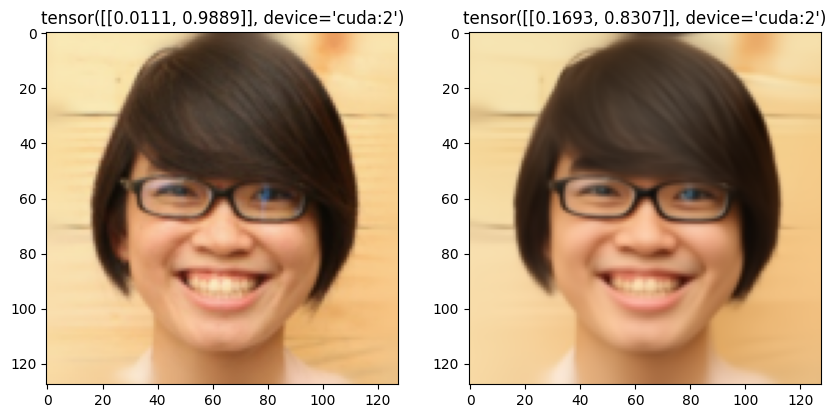

In [32]:
i = random.choice(range(0, len(data)))
img = data[i]['img'][None]
flip_class(img)

Encoding stochastic...
tensor([[0.9108, 0.0892]], device='cuda:2') tensor([[0., 1.]], device='cuda:2')


Cosine similarity: 0.9965507984161377 
 Euclidean distance: 0.9668861031532288
Euclidean distance of the same cond: 0.0
Generating results...


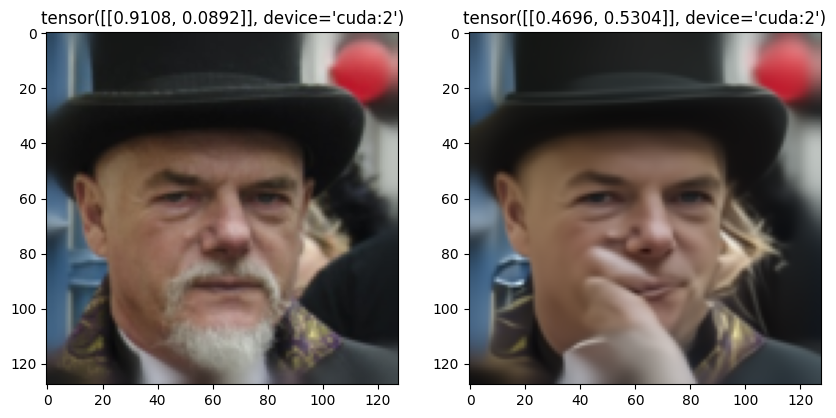

In [33]:
i = random.choice(range(0, len(data)))
img = data[i]['img'][None]
flip_class(img)

Encoding stochastic...
tensor([[0.0511, 0.9489]], device='cuda:2') tensor([[1., 0.]], device='cuda:2')


Cosine similarity: 0.9955154657363892 
 Euclidean distance: 1.0072822570800781
Euclidean distance of the same cond: 0.0
Generating results...


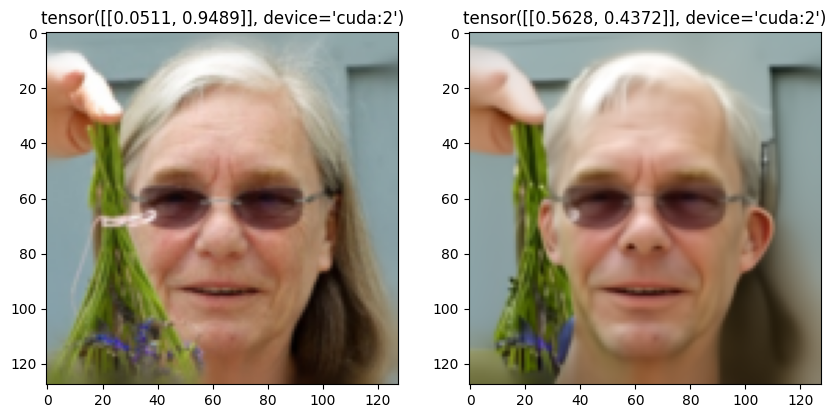

In [34]:
i = random.choice(range(0, len(data)))
img = data[i]['img'][None]
flip_class(img)

Encoding stochastic...


tensor([[0.7898, 0.2102]], device='cuda:2') tensor([[0., 1.]], device='cuda:2')


Cosine similarity: 0.9969095587730408 
 Euclidean distance: 0.8383932709693909
Euclidean distance of the same cond: 0.0
Generating results...


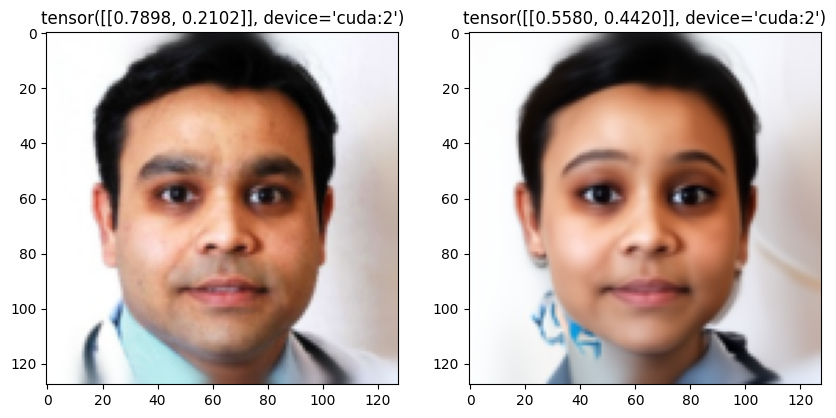

In [35]:
i = random.choice(range(0, len(data)))
img = data[i]['img'][None]
flip_class(img)

Encoding stochastic...
tensor([[0.0025, 0.9975]], device='cuda:2') tensor([[1., 0.]], device='cuda:2')


Cosine similarity: 0.9953845739364624 
 Euclidean distance: 1.0589420795440674
Euclidean distance of the same cond: 0.0
Generating results...


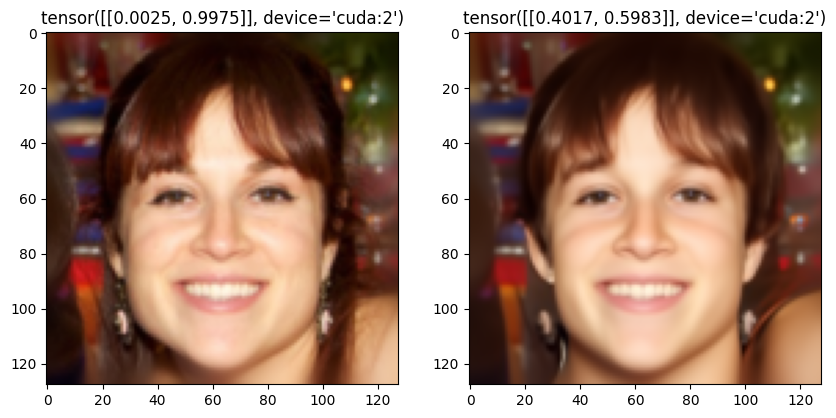

In [36]:
i = random.choice(range(0, len(data)))
img = data[i]['img'][None]
flip_class(img)

Encoding stochastic...


tensor([[0.7953, 0.2047]], device='cuda:2') tensor([[0., 1.]], device='cuda:2')


Cosine similarity: 0.9972497224807739 
 Euclidean distance: 0.844318687915802
Euclidean distance of the same cond: 0.0
Generating results...


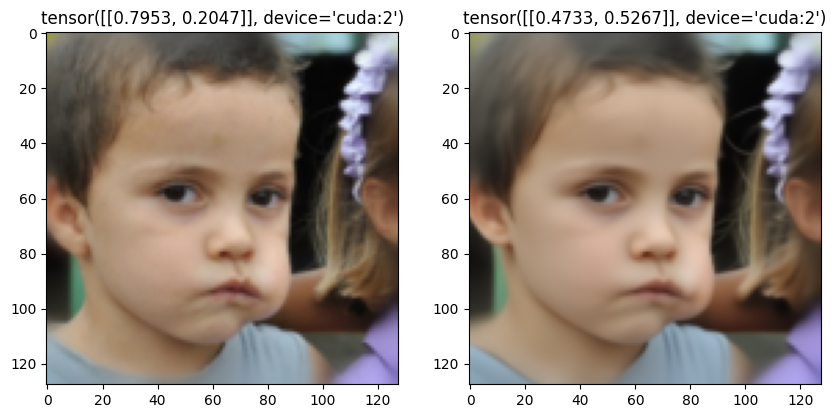

In [37]:
i = random.choice(range(0, len(data)))
img = data[i]['img'][None]
flip_class(img)